# 基礎統計(Statistics Fundamentals)

## 載入檔案

In [1]:
import random 
import pandas as pd
import numpy as np

# 讀取檔案
df = pd.read_csv('./data/president_heights.csv')
df.rename(columns={df.columns[-1]:'height'}, inplace=True)

# 觀看前 5 筆
df.head() 

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


## 描述統計量(Descriptive Statistics)

In [2]:
# 集中趨勢(Central Tendency)
print(f"平均數={df['height'].mean()}")
print(f"中位數={df['height'].median()}")
print(f"眾  數={df['height'].mode()[0]}")
print()

# 資料離散的程度(Measures of Variance)
from scipy import stats

print(f"級距(Range)={df['height'].max() - df['height'].min()}")
print(f"182cm 百分位數={stats.percentileofscore(df['height'], 182, 'strict')}")
print(f"變異數={df['height'].std():.2f}")

平均數=179.73809523809524
中位數=182.0
眾  數=183

級距(Range)=30
182cm 百分位數=47.61904761904762
變異數=7.02


## 四分位數(Quartiles)

In [3]:
print(f"四分位數\n{df['height'].quantile([0.25, 0.5, 0.75, 1])}")

四分位數
0.25    174.25
0.50    182.00
0.75    183.00
1.00    193.00
Name: height, dtype: float64


## 常見描述統計量

In [4]:
print(f"{df['height'].describe()}")

count     42.000000
mean     179.738095
std        7.015869
min      163.000000
25%      174.250000
50%      182.000000
75%      183.000000
max      193.000000
Name: height, dtype: float64


## 箱形圖(box plot)或盒鬚圖

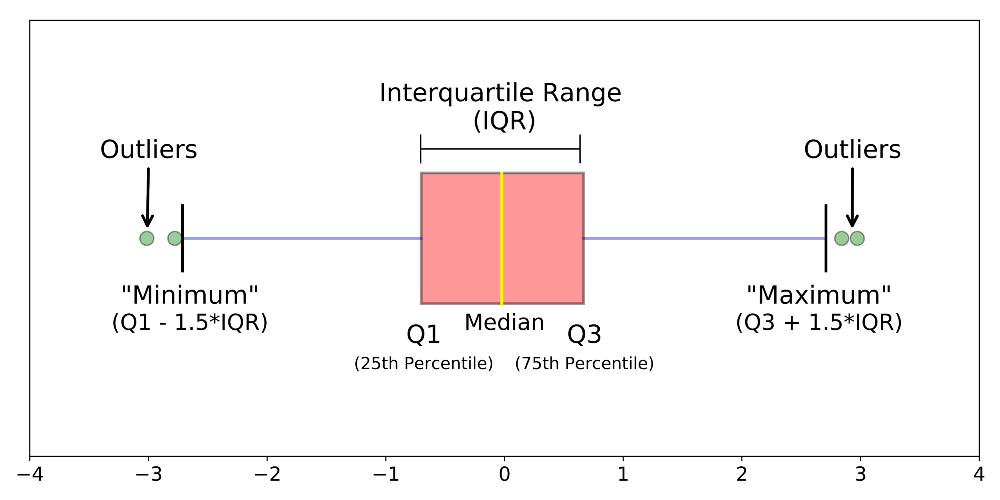

In [5]:
from IPython.display import Image
Image('./images/Boxplot.png', width=800)

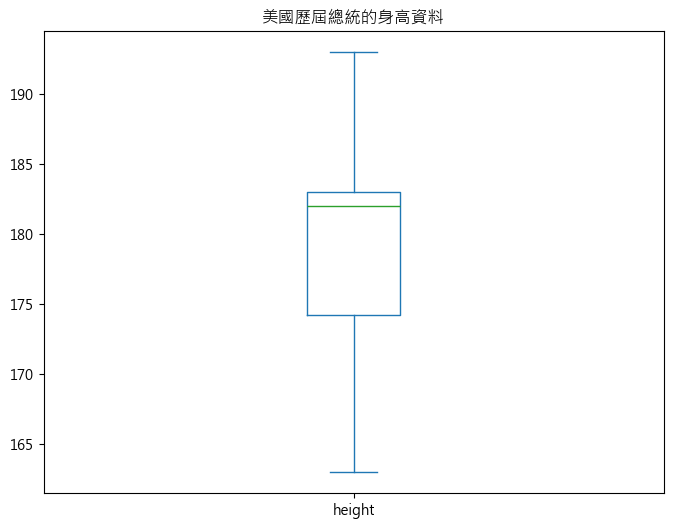

In [6]:
import matplotlib.pyplot as plt

# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 微軟正黑體
plt.rcParams['axes.unicode_minus'] = False

df['height'].plot(kind='box', title='美國歷屆總統的身高資料', figsize=(8,6))
plt.show()

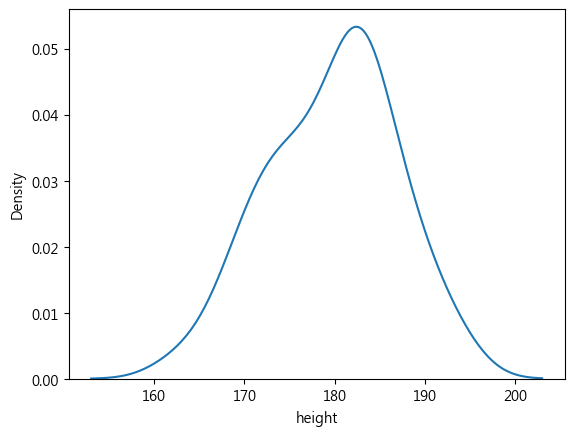

In [7]:
# 直方圖
import seaborn as sns

# 繪圖
sns.kdeplot(df['height'])
plt.show()

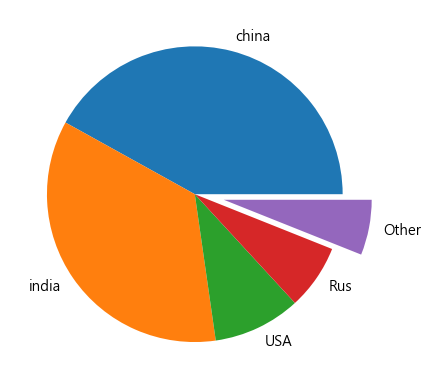

In [8]:
# 餅圖(Pie Chart)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 讀取資料檔
df = pd.read_csv('./data/gdp.csv')

# 轉為整數欄位
df.pop = df['pop'].astype(int)

# 取最大 5 筆
df2 = df.nlargest(5, 'pop')

# 散佈圖(Scatter Chart) 
plt.pie(df2['pop'], explode=[0, 0,0,0,0.2], labels=['china', 'india', 'USA', 'Rus', 'Other'])

plt.show()

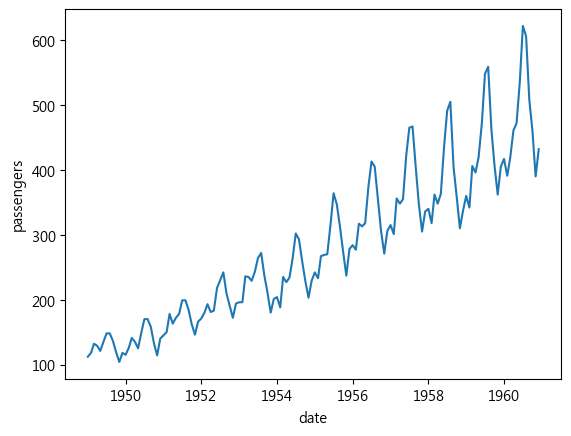

In [9]:
# 線圖(Line Chart)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 讀取資料檔
df = pd.read_csv('./data/airline.csv')

# 轉為日期欄位
df['date'] = pd.to_datetime(df['date'])

# 繪圖
sns.lineplot(x=df['date'], y=df['passengers'])
plt.show()

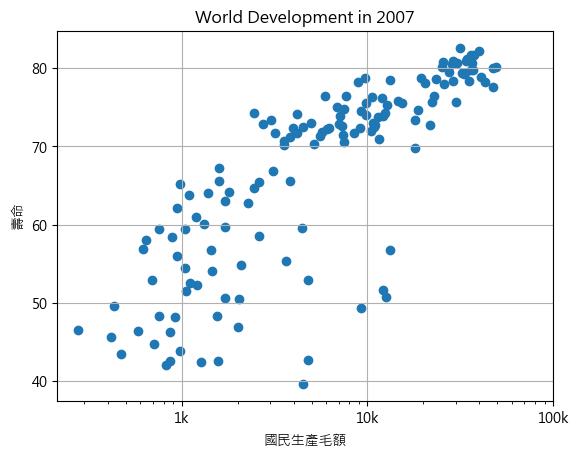

In [10]:
# 散佈圖(Scatter Chart) 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 讀取資料檔
df = pd.read_csv('./data/gdp.csv')

# 轉為整數欄位
df.pop = df['pop'].astype(int)

# 繪製散佈圖(Scatter Chart) 
plt.scatter(x = df.gdp, y = df.life_exp)

# 設定繪圖屬性
plt.xscale('log') 
plt.xlabel('國民生產毛額')
plt.ylabel('壽命')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.grid()

plt.show()

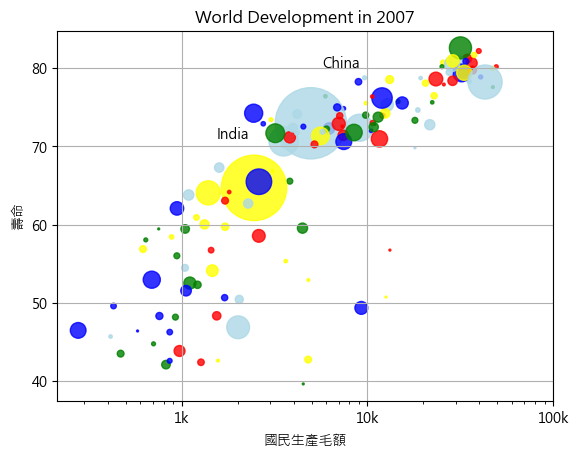

In [11]:
# 氣泡圖(Bubble Chart)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 讀取資料檔
df = pd.read_csv('./data/gdp.csv')

# 轉為整數欄位
df.pop = df['pop'].astype(int)

# 繪製散佈圖(Scatter Chart) + 加一個變數 pop，作為點的大小
col=np.resize(['red', 'green', 'blue', 'yellow', 'lightblue'], df.shape[0])
plt.scatter(x = df.gdp, y = df.life_exp, s = df.pop * 2, c = col, alpha = 0.8)

# 設定繪圖屬性
plt.xscale('log') 
plt.xlabel('國民生產毛額')
plt.ylabel('壽命')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.grid()

# 加註
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

plt.show()

## 關聯係數(Correlation coefficient)
$\begin{equation}r_{x,y} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})(y_{i} -\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}(y_{i} -\bar{y})^{2}}}\end{equation}$

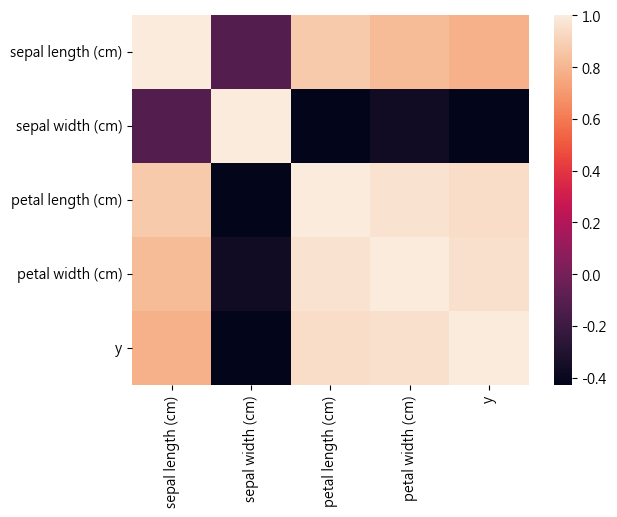

In [12]:
# 熱力圖(Heatmap)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# 讀取 sklearn 內建資料檔
ds = datasets.load_iris()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['y'] = ds.target

# 繪製熱力圖(Heatmap)
# df.corr()：關聯係數(Correlation coefficient)
sns.heatmap(df.corr())
plt.show()

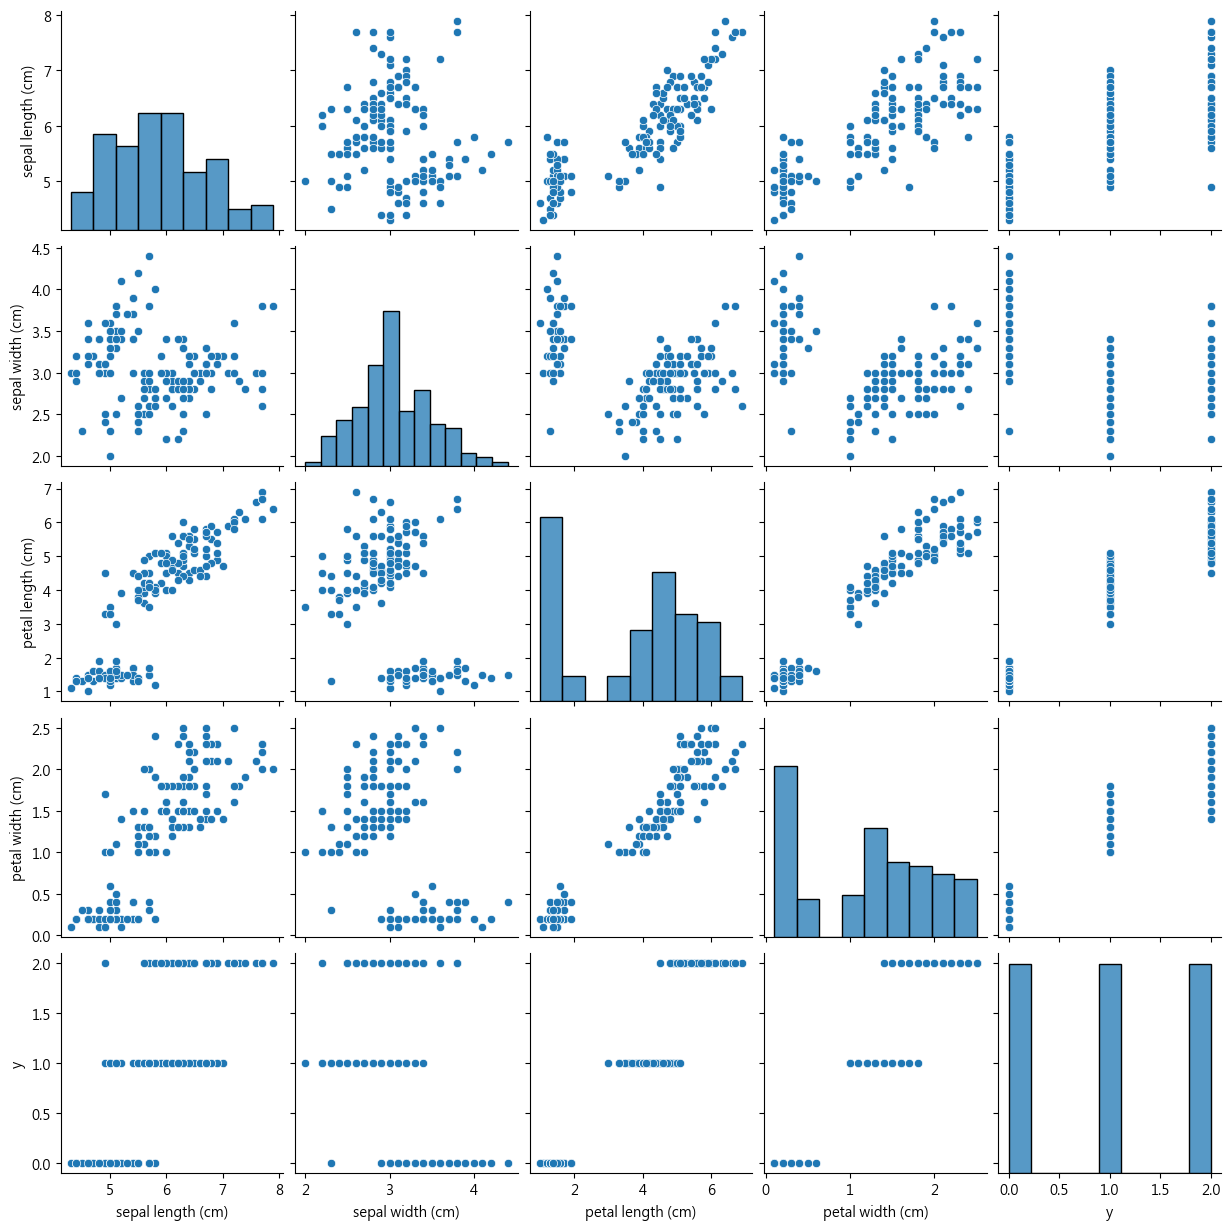

In [13]:
# pairplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# 讀取 sklearn 內建資料檔
ds = datasets.load_iris()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['y'] = ds.target

# 繪圖
sns.pairplot(df)
plt.show()